# CSE151A Group Project Milestone 3

### Data Link: https://huggingface.co/datasets/wykonos/movies/viewer/default/train?sort[column]=popularity&sort[direction]=desc

## Data Exploration

In [1]:
from datasets import load_dataset
import pandas as pd

moviesDict = load_dataset("wykonos/movies")

print(moviesDict.shape)

print(moviesDict['train'].features.keys())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


movies_dataset.csv:   0%|          | 0.00/350M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/722796 [00:00<?, ? examples/s]

{'train': (722796, 20)}
dict_keys(['id', 'title', 'genres', 'original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations'])


# Milestone 2

1. **How many observations does your dataset have?**

  - Our dataset has 722796 observations with 20 features

2. **Describe all columns in your dataset their scales and data distributions. Describe the categorical and continuous variables in your dataset. Describe your target column.**

  - Id - Unique ID for each movie
  - Title - Title of movie in observation
  - Genres - Genre of the movie in the observation
    - Categorical
  - Original language - The language that the movie is in
    - Categorical
  - Overview - Description of what the movie is about
  - Popularity - A scale of how popular a movie was based on votes and views
    - Continuous
    - Range from 0 - 6.68k
    - Mean - 1.8
  - Production Companies - Company who made the film
  - Release Date - When the movie was released
  - Budget - Budget of the film in USD
    - Continuous
    - 686k missing
    - Range from 0 - 5,000,000,000
  - Revenue - How much money the film made
    - Continuous
    - 705,000 missing
  - Runtime - Length of the movie in minutes
    - Continuous
    - 131k missing
    - Mean - 198
  - Status - Has the movie been released, cancelled, unreleased
    - Categorical
  - Tagline - Movie tagline
  - Vote average - Average public voting of the film
    - Range from 1-10
    - Continuous
    - Mean - 2.4
    - 296k missing
  - Vote count - Hoe many votes were counted
    - Continuous
    - 0 - 33k
    - Mean - 27.6
    - 296 missing
  - Credits - Actors in the movie
  - Keywords - Words used to categorize the movie
  - Poster path - link to poster
  - Backdrop path - link to backdrop

  - TARGET: Vote average - We want to be able to predict the how the public will vote on a particular movie, given other attributes

3. **Do you have missing and duplicate values in your dataset?**

  - Yes, there are missing values that have either a 0 or null in every category, number of missing is listed under each feature

## Data Plots

### Dataset Matrix
This is what our dataset looks like.

In [2]:
moviesDF = pd.DataFrame.from_dict(moviesDict['train'])

moviesDF.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,385687,Fast X,Action-Crime-Thriller,en,Over many missions and against impossible odds...,6682.100,Universal Pictures-Original Film-One Race-Perf...,2023-05-17,340000000.0,6.867000e+08,142.0,Released,The end of the road begins.,7.331,1856.0,Vin Diesel-Michelle Rodriguez-Tyrese Gibson-Lu...,sequel-revenge-racing-family-cars,/fiVW06jE7z9YnO4trhaMEdclSiC.jpg,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,19603-445954-697843-603692-781009-502356-74735...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,4.757662e+08,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
3,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,2.690000e+08,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
4,502356,The Super Mario Bros. Movie,Animation-Family-Adventure-Fantasy-Comedy,en,While working underground to fix a water main ...,3859.926,Universal Pictures-Illumination-Nintendo,2023-04-05,100000000.0,1.278767e+09,92.0,Released,None,7.764,4042.0,Chris Pratt-Charlie Day-Anya Taylor-Joy-Jack B...,video game-gorilla-plumber-magic mushroom-anth...,/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg,/2klQ1z1fcHGgQPevbEQdkCnzyuS.jpg,713704-385687-640146-60898-758323-1008005-4935...


### Other Dataset Information

In [3]:
moviesDF['release_date'] = pd.to_datetime(moviesDF['release_date'], errors='coerce')
min_date = moviesDF['release_date'].min()
max_date = moviesDF['release_date'].max()
print("Earliest movie release:", min_date)
print("Latest movie release:", max_date)
print("Range of years:", max_date.year - min_date.year)

Earliest movie release: 1874-12-09 00:00:00
Latest movie release: 2049-01-01 00:00:00
Range of years: 175


### Histograms of Different Attributes
Our data on most of these attributes is skewed toward one end of the graph, except for vote_average, which has an okay looking distribution.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

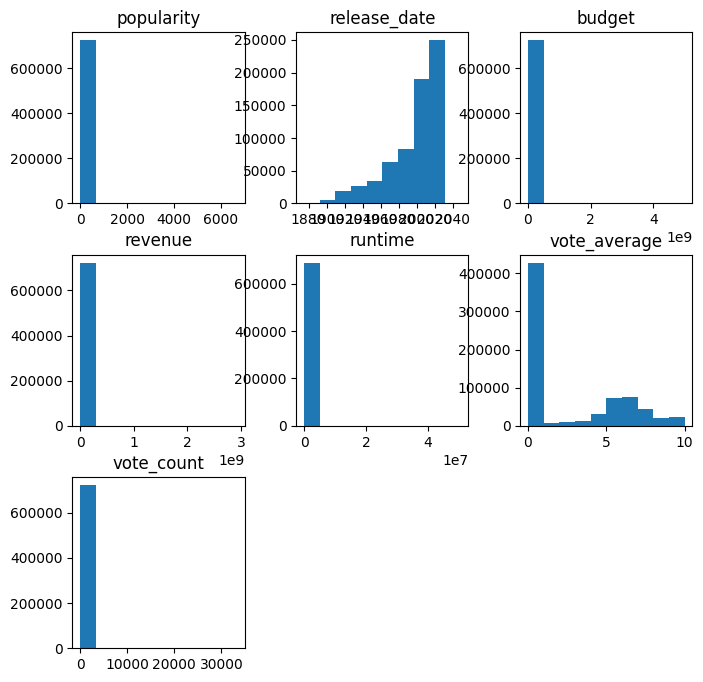

In [4]:
import numpy as np
import seaborn as sns

moviesDF.drop(columns=['id']).hist(figsize = (8, 8), grid = False)

Applying log scale removes some of the skew, but we may need to consider other data preprocessing methods to explore this data.

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

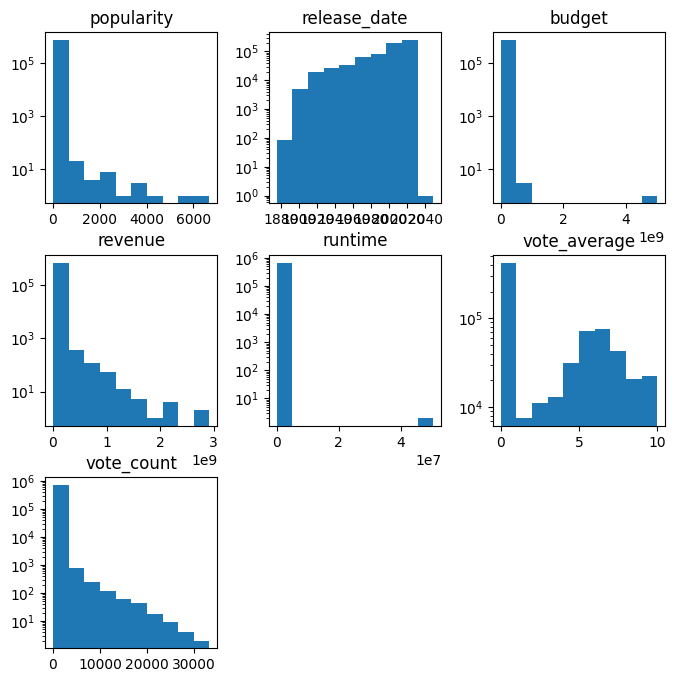

In [5]:
moviesDF.drop(columns=['id']).hist(figsize = (8, 8), grid = False, log = True)

### Pair Plot of Dataset Attributes
The most interesting plots are as follows:

*   Vote average vs Revenue - People don't seem to give higher or lower ratings to movies that earn more revenue
*   Vote count vs Revenue - These two look like they have some correlation, as the more revenue a movie makes, the more people vote on that movie
*   Vote count vs Vote average - It looks like votes tend to average around a 6 or 7. The amount of people voting skews the votes slightly higher but in the same range.



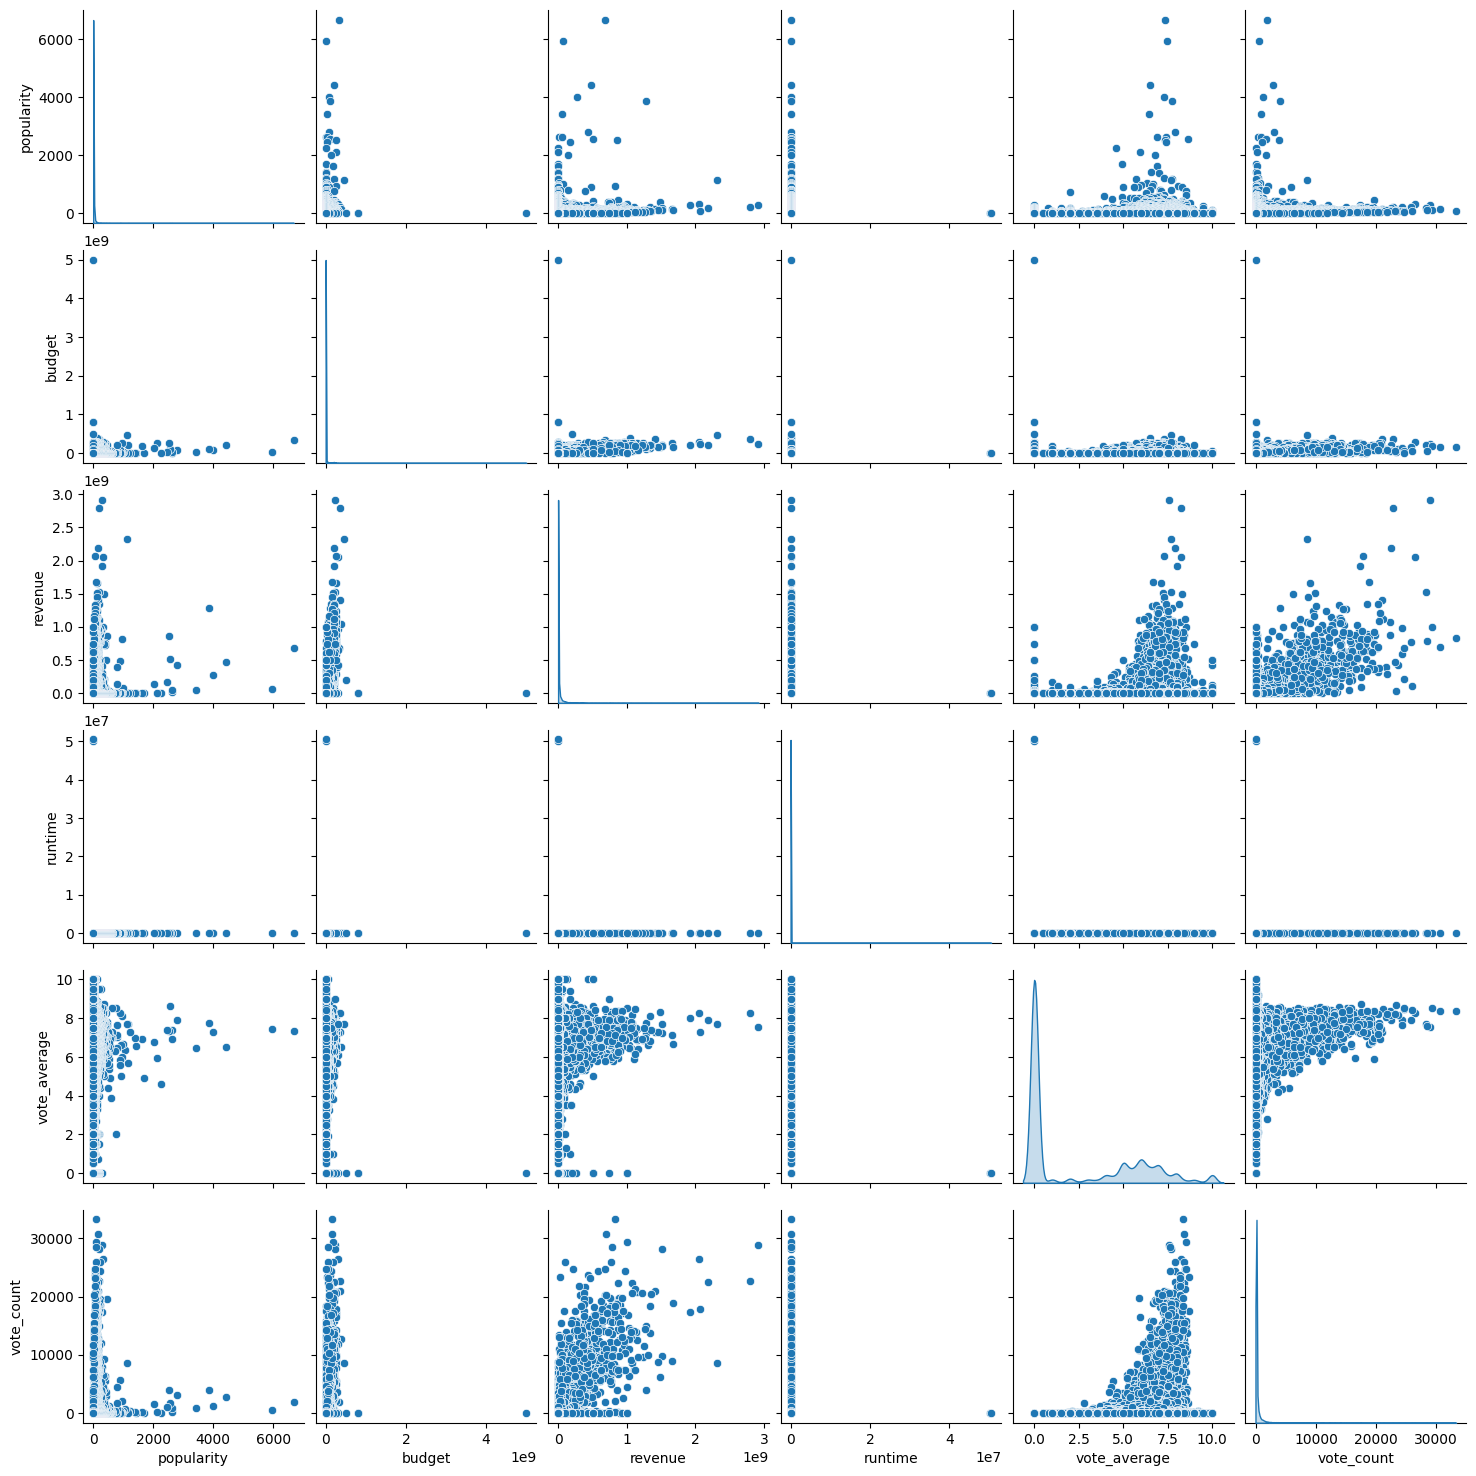

In [6]:
sns.pairplot(moviesDF.drop(columns=['id']), diag_kind='kde')

<Axes: >

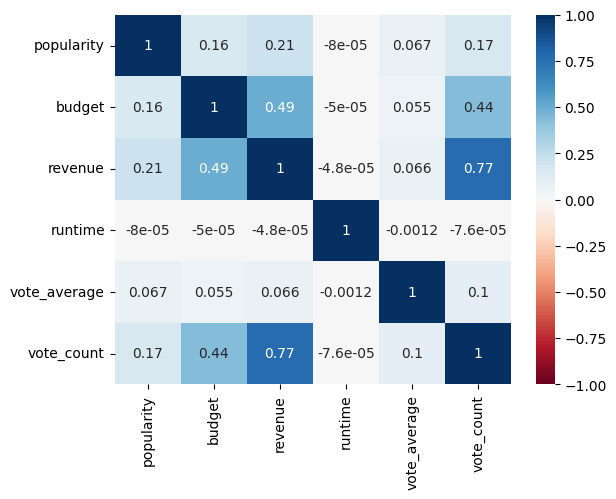

In [7]:
numDF = moviesDF.drop(columns=['id', 'title', 'genres', 'original_language',	'overview',	'production_companies',	'release_date',	'status',	'tagline',	'credits',	'keywords',	'poster_path',	'backdrop_path',	'recommendations'])
corr = numDF.corr(method='pearson')
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

From this correlation heatmap, we can see which data values are related with one another. We can see that vote average mostly relies on vote count. We need to clean up the data to be able to pull more inferences from the data for vote average.

# Milestone 3

1. Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).  (10 points)

In [8]:
# Predicting vote_average

# Filter out unreleased: https://huggingface.co/docs/datasets/v1.14.0/process.html#select-and-filter
moviesFiltered = moviesDict['train'].filter(lambda row: row['status'] == 'Released')

# Keep columns: genre, original_language, popularity, release_date, budget, revenue, runtime, vote_average, vote_count
# Remove id after data processing
colsToKeep = ['id', 'genres', 'original_language', 'popularity', 'release_date', 'budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
moviesFiltered = moviesFiltered.select_columns(colsToKeep)

# Either fill with zero or mean depending on what makes the most sense for the feature
moviesFiltered = pd.DataFrame.from_dict(moviesFiltered)
moviesFiltered['genres'] = moviesFiltered['genres'].fillna('other')
moviesFiltered['original_language'] = moviesFiltered['original_language'].fillna('zz')
moviesFiltered['popularity'] = moviesFiltered['popularity'].fillna(0)
moviesFiltered['release_date'] = pd.to_datetime(moviesFiltered['release_date'], errors='coerce')
# Change release date to the year
moviesFiltered['release_date'] = moviesFiltered['release_date'].dt.year.fillna(0).astype(int)
moviesFiltered['budget'] = moviesFiltered['budget'].fillna(0)
moviesFiltered['revenue'] = moviesFiltered['revenue'].fillna(0)
moviesFiltered['runtime'] = moviesFiltered['runtime'].fillna(0)
moviesFiltered['vote_average'] = moviesFiltered['vote_average'].fillna(0)
moviesFiltered['vote_count'] = moviesFiltered['vote_count'].fillna(0)

# Collapse duplicates before this or one-hot encoding will take max of duplicate columns

# One-hot encode genre - yields 20 genres
moviesFiltered['genres'] = moviesFiltered['genres'].str.split('-')
moviesFiltered = pd.get_dummies(moviesFiltered.explode('genres'), columns=['genres'], dtype=int).groupby('id').max()

# Decide if we're doing regression, classification or both
# If we do classification vote_average, maybe set data 7+ as a "good movie"

moviesFiltered

# Remove ID column?

Filter:   0%|          | 0/722796 [00:00<?, ? examples/s]

,original_language,popularity,release_date,budget,revenue,runtime,vote_average,vote_count,genres_Action,genres_Adventure,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western,genres_other
id,,,,,,,,,,,,,,,,,,,,,
2,fi,8.067,1988,0.0,0.0,73.0,7.0,223.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,fi,10.186,1986,0.0,0.0,74.0,7.2,203.0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,en,41.855,1995,4000000.0,4257354.0,98.0,5.7,2288.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,en,9.730,1993,21000000.0,12136938.0,109.0,6.6,275.0,1,0,...,0,0,0,0,0,0,1,0,0,0
11,en,96.126,1977,11000000.0,775398007.0,121.0,8.2,18331.0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968156,zh,0.600,0,0.0,0.0,89.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
968157,tl,0.600,0,0.0,0.0,5.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
968159,en,0.600,0,0.0,0.0,4.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# apply log1p transform to reduce skew
# doing this with missing values as 0 right now and creating new columns ''column'_log' so we can compare data/ not override anything

for col in ["budget", "revenue", "vote_count", "popularity"]:
  moviesFiltered[f"{col}_log"] = np.log1p(moviesFiltered[col].clip(lower=0))

# just clip runtime to reasonable range
moviesFiltered["runtime"] = moviesFiltered["runtime"].clip(5, 300)

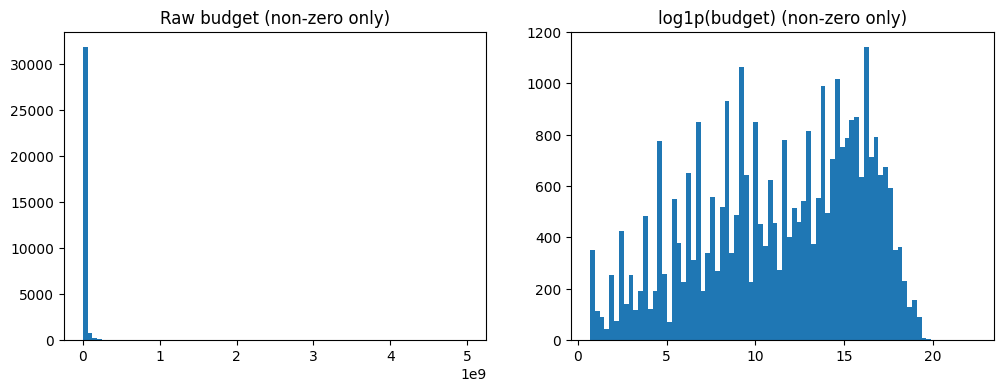

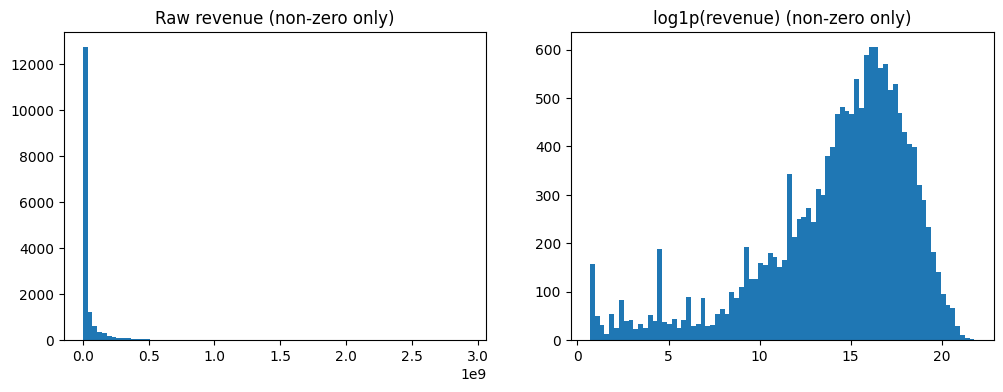

In [10]:
import matplotlib.pyplot as plt

# comparison of our raw budget and revenue next to log-transformed values (with 0 values dropped)
for col in ["budget", "revenue"]:

  nz = moviesFiltered[col][moviesFiltered[col] > 0] # keeps only non zero values

  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.hist(nz, bins=80)
  plt.title(f"Raw {col} (non-zero only)")

  plt.subplot(1,2,2)
  plt.hist(np.log1p(nz), bins=80)
  plt.title(f"log1p({col}) (non-zero only)")

  plt.show()

In [11]:
# One-hot encode original_language
top_langs = moviesFiltered["original_language"].value_counts().head(10).index # pick top 10 languages
moviesFiltered["original_lang"] = moviesFiltered["original_language"].apply(
  lambda x: x if x in top_langs else "zz"
)

moviesFiltered = pd.get_dummies(moviesFiltered, columns=["original_lang"], dtype=int)
moviesFiltered.columns

Index(['original_language', 'popularity', 'release_date', 'budget', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy',
       'genres_History', 'genres_Horror', 'genres_Music', 'genres_Mystery',
       'genres_Romance', 'genres_Science Fiction', 'genres_TV Movie',
       'genres_Thriller', 'genres_War', 'genres_Western', 'genres_other',
       'budget_log', 'revenue_log', 'vote_count_log', 'popularity_log',
       'original_lang_de', 'original_lang_en', 'original_lang_es',
       'original_lang_fr', 'original_lang_it', 'original_lang_ja',
       'original_lang_ko', 'original_lang_pt', 'original_lang_ru',
       'original_lang_zh', 'original_lang_zz'],
      dtype='object')

In [12]:
num_cols = ["budget", "revenue", "popularity", "vote_count", "runtime"]

for col in num_cols:
  zero_count = (moviesFiltered[col] == 0).sum()
  total = moviesFiltered[col].shape[0]
  print(f"{col}: {zero_count} zeros out of {total} ({zero_count/total:.2%})")

budget: 623451 zeros out of 656404 (94.98%)
revenue: 640158 zeros out of 656404 (97.52%)
popularity: 0 zeros out of 656404 (0.00%)
vote_count: 394692 zeros out of 656404 (60.13%)
runtime: 0 zeros out of 656404 (0.00%)


*****Test Area - Delete this when done testing

In [13]:
#moviesFiltered['genres'].value_counts()
#print(moviesFiltered[moviesFiltered['genres'].isna()])
#moviesFiltered['genres'].unique().tolist()

#moviesFiltered[moviesFiltered['id'].duplicated()]

#moviesTest = pd.DataFrame.from_dict(moviesDict['train'])
#moviesTest[moviesTest['id'].duplicated(keep=False)].sort_values('id')

#moviesFiltered['id'].nunique()

#moviesFiltered['id'].isna().sum()
#moviesFiltered['id'].nunique()

genre_cols = [c for c in moviesFiltered.columns if c.startswith("genres_")]
print("Number of genres:", len(genre_cols))
print("Genre columns:", genre_cols)

lang_cols = [c for c in moviesFiltered.columns if c.startswith("original_lang")]
print("Number of language columns:", len(lang_cols))
print("Language columns:", lang_cols)

print(moviesFiltered.shape)
print(moviesFiltered.columns)

Number of genres: 20
Genre columns: ['genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy', 'genres_History', 'genres_Horror', 'genres_Music', 'genres_Mystery', 'genres_Romance', 'genres_Science Fiction', 'genres_TV Movie', 'genres_Thriller', 'genres_War', 'genres_Western', 'genres_other']
Number of language columns: 12
Language columns: ['original_language', 'original_lang_de', 'original_lang_en', 'original_lang_es', 'original_lang_fr', 'original_lang_it', 'original_lang_ja', 'original_lang_ko', 'original_lang_pt', 'original_lang_ru', 'original_lang_zh', 'original_lang_zz']
(656404, 43)
Index(['original_language', 'popularity', 'release_date', 'budget', 'revenue',
       'runtime', 'vote_average', 'vote_count', 'genres_Action',
       'genres_Adventure', 'genres_Animation', 'genres_Comedy', 'genres_Crime',
       'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fan

  2. Train your first model and analyze your model's performance. Evaluate your model and compare training vs. test error. Only SVMs, Naive Bayes, KNNs and Decision trees or any form of these models can be used for your first model selection. Include example ground truth and predictions for train, validation and test(10 points)

In [14]:
# KNN Model

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Split x and y
y = moviesFiltered["vote_average"].to_numpy(float)
X = moviesFiltered.drop(columns=["id", "original_language", "vote_average"], errors="ignore").to_numpy(float)

# shuffle
np.random.seed(14)
perm = np.random.permutation(X.shape[0])
X, y = X[perm], y[perm]

# split 80/20
split_idx = int(X.shape[0] * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# standardization (fit on train, apply to both)
train_mean = X_train.mean(axis=0)
train_std  = X_train.std(axis=0)
train_std[train_std == 0] = 1.0

X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled  = (X_test  - train_mean) / train_std

#train KNN 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#predict
y_pred = knn.predict(X_test_scaled)

In [15]:
# evaluate
print("KNN where K = 5")
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(((y_test - y_pred) ** 2).mean()))
print("Within ±1.0 rating (%):", (np.abs(y_test - y_pred) <= 1.0).mean() * 100)

KNN where K = 5
Test MSE: 1.9740207604710505
Test R^2: 0.8022559295348624
RMSE: 1.4049984912700264
Within ±1.0 rating (%): 78.31597870217321


In [16]:
#train KNN 2
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

#predict
y_pred = knn.predict(X_test_scaled)

# evaluate
print("KNN where K = 5")
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(((y_test - y_pred) ** 2).mean()))
print("Within ±1.0 rating (%):", (np.abs(y_test - y_pred) <= 1.0).mean() * 100)

KNN where K = 5
Test MSE: 2.289919793502106
Test R^2: 0.7706112974730113
RMSE: 1.5132480938372617
Within ±1.0 rating (%): 79.02590626213998


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split X and y
y = moviesFiltered["vote_average"].to_numpy(float)
X = moviesFiltered.drop(columns=["id", "original_language", "vote_average"], errors="ignore").to_numpy(float)

# shuffle
np.random.seed(14)
perm = np.random.permutation(X.shape[0])
X, y = X[perm], y[perm]

# split 80/20
split_idx = int(X.shape[0] * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# standardization
train_mean = X_train.mean(axis=0)
train_std  = X_train.std(axis=0)
train_std[train_std == 0] = 1.0
X_train_scaled = (X_train - train_mean) / train_std
X_test_scaled  = (X_test  - train_mean) / train_std

# train RF
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    max_features=0.5,
    min_samples_leaf=5,
    bootstrap=True,
    max_samples=0.7,
    n_jobs=-1,
    random_state=14,
    verbose=1
)
rf.fit(X_train_scaled, y_train)

# predict
y_pred = rf.predict(X_test_scaled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    1.5s finished


In [18]:
# evaluate
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R^2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(((y_test - y_pred) ** 2).mean()))
print("Within ±1.0 rating (%):", (np.abs(y_test - y_pred) <= 1.0).mean() * 100)

Test MSE: 1.2106617806181366
Test R^2: 0.8787240776541404
RMSE: 1.1003007682529975
Within ±1.0 rating (%): 82.8337687860391


3. Answer the questions: Where does your model fit in the fitting graph? (Build at least one model with different hyperparameters and check for over/underfitting, pick the best model). What are the next models you are thinking of and why? (5 points)

On the fitting curve, k = 2 shows overfitting, driving training error down but generalizes worse on the test set (MSE = 2.290, RMSE ≈ 1.513, R² = 0.771, ±1.0 = 79.0%). Increasing to k = 5 smooths the model and improves generalization (MSE = 1.974, RMSE ≈ 1.405, R² = 0.802, ±1.0 = 78.3%). Despite the slightly lower ±1.0 rate, k = 5 has clearly better aggregate error and explains more variance, so we select it. The next model we’re considering is a RandomForestRegressor on the same 80/20 split, should capture non-linear interactions across our log numerics and one-hots and reduce variance via bagging. We’ll compare its RMSE/R² to the k = 5 KNN and tune if it performs better.

4. Conclusion section: What is the conclusion of your 1st model? What can be done to possibly improve it? (5 points)

The first model is a decent baseline, but there’s room to improve it. We can try deeper trees and run a small grid search to tune depth, number of trees, and feature subsampling for the ideal hyperparameters for our data. We can process some of the features like recommendations/credits/keywords using encoding or TF-IDF to find the most significant words to improve our models since it may have a significant corellation. After cleaning NAs and clipping outliers, we could compare Random Forest, ExtraTrees, and a boosted model, keeping the best via cross-validated RMSE. These steps should realistically lower RMSE and bump R².

5. Update your README.md to include your new work and updates you have all added. Make sure to upload all code and notebooks. Provide links in your README.md